In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data_train=pd.read_csv('train_data.csv')
data_test=pd.read_csv('test_data.csv')

In [3]:
print("The shape of the Training set: ", data_train.shape)
print("The shape of the Testing set: ", data_test.shape)

The shape of the Training set:  (169307, 43)
The shape of the Testing set:  (91166, 42)


In [4]:
X_total=data_train.drop('target',axis=1)
X_total=X_total.append(data_test)
X_test=data_test[['connection_id']]

In [5]:
X_train=data_train[['connection_id']]

In [6]:
X_total_num=X_total.drop(['connection_id','cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_7','cat_8','cat_9','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19','cat_20','cat_21','cat_22','cat_23'],axis=1)

In [7]:
X_total.shape

(260473, 42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
X_total_num_scld=StandardScaler().fit_transform(X_total_num)

In [10]:
pca=PCA()
X_total_num_trf=pca.fit_transform(X_total_num_scld)

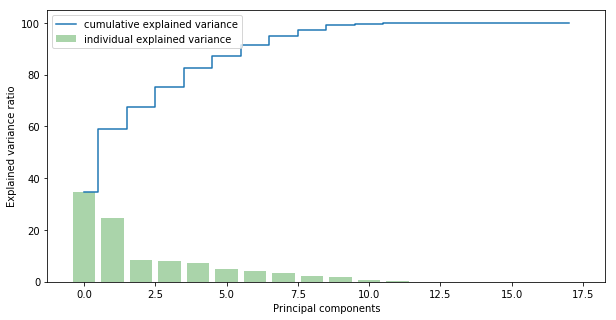

In [11]:
var=(pca.explained_variance_)
tot=sum(var)
var_exp = [(i/tot)*100 for i in sorted(var, reverse=True)] # Individual explained variance

exp_var_ratio=pca.explained_variance_ratio_
cum_var=np.cumsum(exp_var_ratio*100)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(18), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(18), cum_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [12]:
pca=PCA(n_components=10)
X_total_num_trf_10d=pca.fit_transform(X_total_num_scld)
X_total_pca=pd.DataFrame(X_total_num_trf_10d,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [13]:
del X_total_num_trf
del X_total_num_trf_10d

In [14]:
X_total.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255


In [15]:
X_total_cat=pd.DataFrame(X_total,columns=['cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_7','cat_8','cat_9','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19','cat_20','cat_21','cat_22','cat_23'],dtype=str)

In [16]:
for col_name in X_total_cat.columns:
    if X_total_cat[col_name].dtype=='object':
        unique_cat=len(X_total_cat[col_name].unique())
        print("Feature:- {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature:- cat_1 has 3 unique categories
Feature:- cat_2 has 66 unique categories
Feature:- cat_3 has 11 unique categories
Feature:- cat_4 has 2 unique categories
Feature:- cat_5 has 3 unique categories
Feature:- cat_6 has 2 unique categories
Feature:- cat_7 has 19 unique categories
Feature:- cat_8 has 3 unique categories
Feature:- cat_9 has 2 unique categories
Feature:- cat_10 has 15 unique categories
Feature:- cat_11 has 2 unique categories
Feature:- cat_12 has 3 unique categories
Feature:- cat_13 has 13 unique categories
Feature:- cat_14 has 11 unique categories
Feature:- cat_15 has 3 unique categories
Feature:- cat_16 has 7 unique categories
Feature:- cat_17 has 1 unique categories
Feature:- cat_18 has 2 unique categories
Feature:- cat_19 has 2 unique categories
Feature:- cat_20 has 462 unique categories
Feature:- cat_21 has 431 unique categories
Feature:- cat_22 has 256 unique categories
Feature:- cat_23 has 256 unique categories


In [17]:
print(X_total_cat['cat_17'].value_counts().sort_values(ascending=False).head(5))

0    260473
Name: cat_17, dtype: int64


In [18]:
print(X_total_cat['cat_2'].value_counts().sort_values(ascending=False).head(5))
print(X_total_cat['cat_20'].value_counts().sort_values(ascending=False).head(20))

10    148841
13     58964
1      33121
2       5301
11      3751
Name: cat_2, dtype: int64
511    118998
1       20849
510     14282
2        5809
509      3247
3        3167
4        2652
5        2213
6        1875
7        1739
8        1456
9        1371
10       1289
11       1199
12       1106
13        947
14        888
508       798
15        777
16        713
Name: cat_20, dtype: int64


In [19]:
threshold = 5000 # Anything that occurs less than this will be removed.
for col in X_total_cat.columns:
    vc = X_total_cat[col].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    X_total_cat[col].loc[X_total_cat[col].isin(vals_to_remove)] = 'other'

In [20]:
for col_name in X_total_cat.columns:
    if X_total_cat[col_name].dtype=='object':
        unique_cat=len(X_total_cat[col_name].unique())
        print("Feature:- {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature:- cat_1 has 3 unique categories
Feature:- cat_2 has 5 unique categories
Feature:- cat_3 has 4 unique categories
Feature:- cat_4 has 2 unique categories
Feature:- cat_5 has 2 unique categories
Feature:- cat_6 has 2 unique categories
Feature:- cat_7 has 2 unique categories
Feature:- cat_8 has 2 unique categories
Feature:- cat_9 has 2 unique categories
Feature:- cat_10 has 2 unique categories
Feature:- cat_11 has 2 unique categories
Feature:- cat_12 has 2 unique categories
Feature:- cat_13 has 2 unique categories
Feature:- cat_14 has 2 unique categories
Feature:- cat_15 has 2 unique categories
Feature:- cat_16 has 2 unique categories
Feature:- cat_17 has 1 unique categories
Feature:- cat_18 has 2 unique categories
Feature:- cat_19 has 2 unique categories
Feature:- cat_20 has 5 unique categories
Feature:- cat_21 has 7 unique categories
Feature:- cat_22 has 2 unique categories
Feature:- cat_23 has 3 unique categories


In [21]:
X_total_cat.drop('cat_17',axis=1,inplace=True)

In [22]:
X_total_dummies=pd.get_dummies(X_total_cat)

In [23]:
X_total_dummies.head()

,cat_1_1,cat_1_2,cat_1_3,cat_2_1,cat_2_10,cat_2_13,cat_2_2,cat_2_other,cat_3_1,cat_3_6,...,cat_21_3,cat_21_4,cat_21_510,cat_21_511,cat_21_other,cat_22_255,cat_22_other,cat_23_1,cat_23_255,cat_23_other
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [24]:
X_total_dummies=X_total_dummies.reset_index()

In [25]:
X_total_dummies.drop('index',axis=1,inplace=True)

In [26]:
X_total_dummied=pd.concat([X_total_pca,X_total_dummies],axis=1)

In [27]:
del X_total_dummies

In [28]:
#cid=X_total[['connection_id']]

In [29]:
X_total=X_total.reset_index()
X_total.drop('index',axis=1,inplace=True)

In [30]:
X_total_dummied['connection_id']=X_total['connection_id']

In [31]:
X_total_dummied.shape

(260473, 70)

In [32]:
X_train=pd.merge(X_train,X_total_dummied,how='left',on='connection_id')

In [33]:
X_train.shape

(169307, 70)

In [34]:
#X_total_dummies=pd.concat([X_total_pca,X_total_dummies],axis=1)

In [35]:
X_test=pd.merge(X_test,X_total_dummied,how='left',on='connection_id')

In [36]:
X_test.shape

(91166, 70)

In [37]:
#X_train=pd.concat([X_train_pca,X_train],axis=1)

In [38]:
Y_train=data_train[['target']]

In [39]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [40]:
from xgboost import XGBClassifier

In [41]:
from sklearn.model_selection import StratifiedKFold,KFold

num_train = X_train.shape[0]
num_test = X_test.shape[0]
SEED = 0 # for same randomized reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
skf = StratifiedKFold(n_splits=NFOLDS, random_state=SEED)
#kf = KFold(n_splits= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier

class Sklearn_Rep(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)


In [42]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((num_train,))
    oof_test = np.zeros((num_test,))
    oof_test_skf = np.empty((NFOLDS, num_test))

    for i,(train_index, test_index) in enumerate(skf.split(x_train,y_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    #oof_test[:] = (oof_test_skf.mean(axis=0))
    return oof_train, oof_test_skf

In [43]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     #'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 8,
    #'min_samples_leaf': 2,
    #'max_features' : 'sqrt',
    #'verbose': 0,
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 10,
    #'min_samples_leaf': 2,
    'verbose': 0,
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# xtreme Gradient Boosting parameters
xgb_params = {'n_estimators': 1000,
 'max_depth': 5,
 'objective': 'multi:softprob',
 'nthread': -1,
 'scale_pos_weight':1
}

In [44]:
# Create objects that represent our models
rf = Sklearn_Rep(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = Sklearn_Rep(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
#ada = Sklearn_Rep(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = Sklearn_Rep(clf=XGBClassifier, seed=SEED, params=xgb_params)

In [45]:
X_train_cid=X_train['connection_id']
X_train=X_train.drop('connection_id',axis=1)
X_test_cid=X_test['connection_id']
X_test=X_test.drop('connection_id',axis=1)

In [46]:
y = pd.factorize(Y_train['target'])[0]

In [47]:
y.shape

(169307,)

In [48]:
rf_oof_train, rf_oof_test_nfolds = get_oof(rf, X_train.values, Y_train.values.ravel(), X_test.values) # Random Forest

In [49]:
Y_train['target'].value_counts()

0    98868
2    36854
1    33585
Name: target, dtype: int64

In [50]:
arr=rf_oof_test_nfolds

In [51]:
axis= 0
u, indices = np.unique(arr, return_inverse=True)
rf_oof_test=u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(arr.shape),
                                None, np.max(indices) + 1), axis=axis)]

In [52]:
print(rf_oof_test)

[ 1.  0.  0. ...,  0.  0.  1.]


In [53]:
et_oof_train, et_oof_test_nfolds = get_oof(et, X_train.values, Y_train.values.ravel(), X_test.values) # extratrees

In [54]:
arr=et_oof_test_nfolds
axis= 0
u, indices = np.unique(arr, return_inverse=True)
et_oof_test=u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(arr.shape),
                                None, np.max(indices) + 1), axis=axis)]

In [55]:
(et_oof_test_nfolds)

array([[ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.]])

In [56]:
predictions_et=pd.DataFrame(et_oof_test,columns=['target_et'])

In [57]:
predictions_et.head()

,target_et
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
predictions_rf=pd.DataFrame(rf_oof_test,columns=['target_rf'])

In [ ]:
xgb_oof_train, xgb_oof_test_nfolds = get_oof(gb, X_train.values, Y_train.values.ravel(), X_test.values)

In [ ]:
xgb_oof_test_nfolds

In [ ]:
arr=xgb_oof_test_nfolds
axis= 0
u, indices = np.unique(arr, return_inverse=True)
xgb_oof_test=u[np.argmax(np.apply_along_axis(np.bincount, axis, indices.reshape(arr.shape),
                                None, np.max(indices) + 1), axis=axis)]

In [ ]:
print(xgb_oof_test)

In [ ]:
predictions_xgb=pd.DataFrame(xgb_oof_test,columns=['target_xgb'])

In [ ]:
predictions_xgb.head()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
eclf1 = VotingClassifier(estimators=[('et', et), ('rf', rf), ('gb', gb)], voting='hard')

In [ ]:
gbm = xgb.XGBClassifier(
 n_estimators= 1000,
 max_depth= 5,
 objective= 'multi:softprob',
 nthread= -1,
 scale_pos_weight=1).fit(X_train.values, Y_train.values.ravel())
predictions = gbm.predict(x_test)

In [ ]:
predictions_rf['target_rf'].value_counts()

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub['target'] = xgb_oof_test
sub['target'] = sub['target'].astype(int)
sub.to_csv('submission.csv', index=False)

In [ ]:
predictions=predictions_rf

In [ ]:
frames = [predictions_rf, predictions_et, predictions_xgb]

In [ ]:
predictions=pd.concat(frames,axis=1)

In [ ]:
predictions.head()

In [ ]:
pred_final=predictions.mode(axis=1)

In [ ]:
pred_final.drop([1,2],axis=1,inplace=True)

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred_final[0]
sub['target'] = sub['target'].astype(int)
sub.to_csv('submission4.csv', index=False)